# PCA

In [25]:
import os, sys, numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=1,
    n_clusters_per_class=1,
    random_state=500,

)

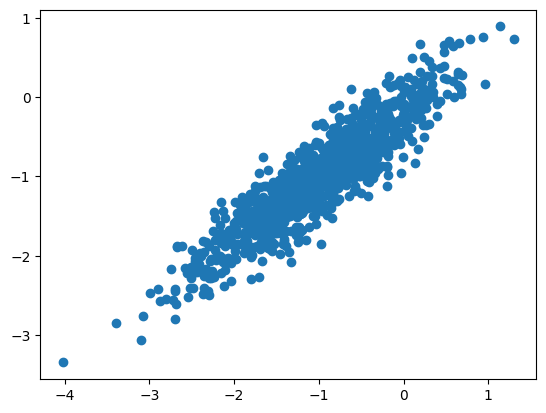

In [27]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Centralização na média

In [28]:
org_data = X
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Média", mean.shape)
mean_data = org_data - mean
print("Dados após subtração da média", org_data.shape, "\n")

Média (2,)
Dados após subtração da média (1000, 2) 



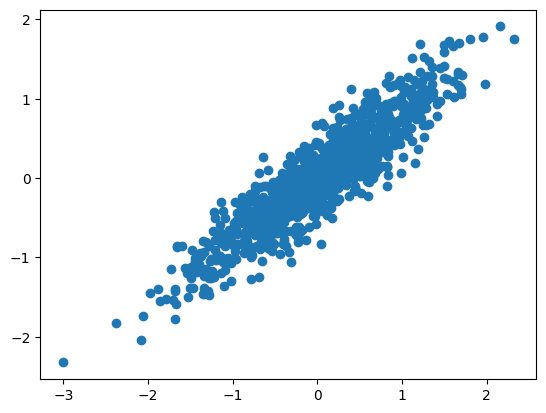

In [29]:
import matplotlib.pyplot as plt
plt.viridis()
plt.scatter(mean_data[:, 0], mean_data[:, 1])
plt.show()

 ### Calcular a matriz de comvariância

In [30]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Matriz de covariância", cov.shape, "\n")
cov

Matriz de covariância (2, 2) 



array([[0.56, 0.45],
       [0.45, 0.43]])

### Executar decomposição da matriz de covariância

In [31]:
eig_val, eig_vec = np.linalg.eig(cov)
print("Autovetores", eig_vec.shape)
print("Autovalores", eig_val.shape, "\n")

Autovetores (2, 2)
Autovalores (2,) 



In [32]:
eig_val

array([0.94967021, 0.04032979])

In [33]:
eig_vec

array([[ 0.75596321, -0.6546141 ],
       [ 0.6546141 ,  0.75596321]])

### Ordenar os autovetores em ordem decrescente

In [35]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Autovetores ordenados", eig_vec.shape)
print("Autovalores ordenados", eig_val.shape, "\n")

Autovetores ordenados (2, 2)
Autovalores ordenados (2,) 



In [36]:
eig_val

array([0.94967021, 0.04032979])

In [37]:
eig_vec

array([[ 0.75596321, -0.6546141 ],
       [ 0.6546141 ,  0.75596321]])

### Calcular a variância explicada e selecionar os N componentes

Variância explicada [0.95926284 0.04073716]
Variância cumulativa [0.95926284 1.        ]


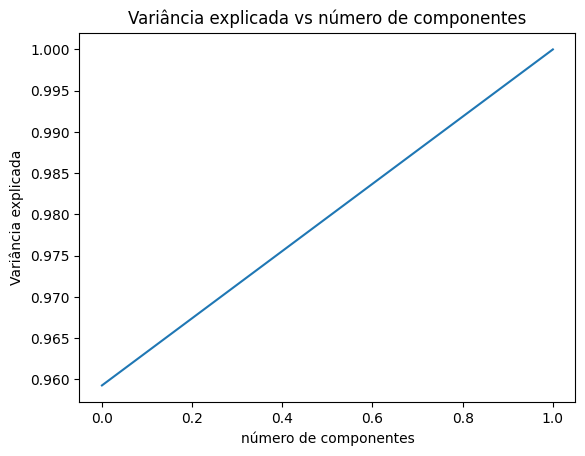

(2, 2)


In [39]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print("Variância explicada", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Variância cumulativa", cumulative_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Variância explicada vs número de componentes")
plt.xlabel("número de componentes")
plt.ylabel("Variância explicada")
plt.show()

## We will 2 components
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
print(eig_vec.shape)

### Projetar dados

In [40]:
# Take transpose of eigen vectors with data
pca_data = mean_data.dot(eig_vec)
print("Dados transformados", pca_data.shape)

Dados transformados (1000, 2)


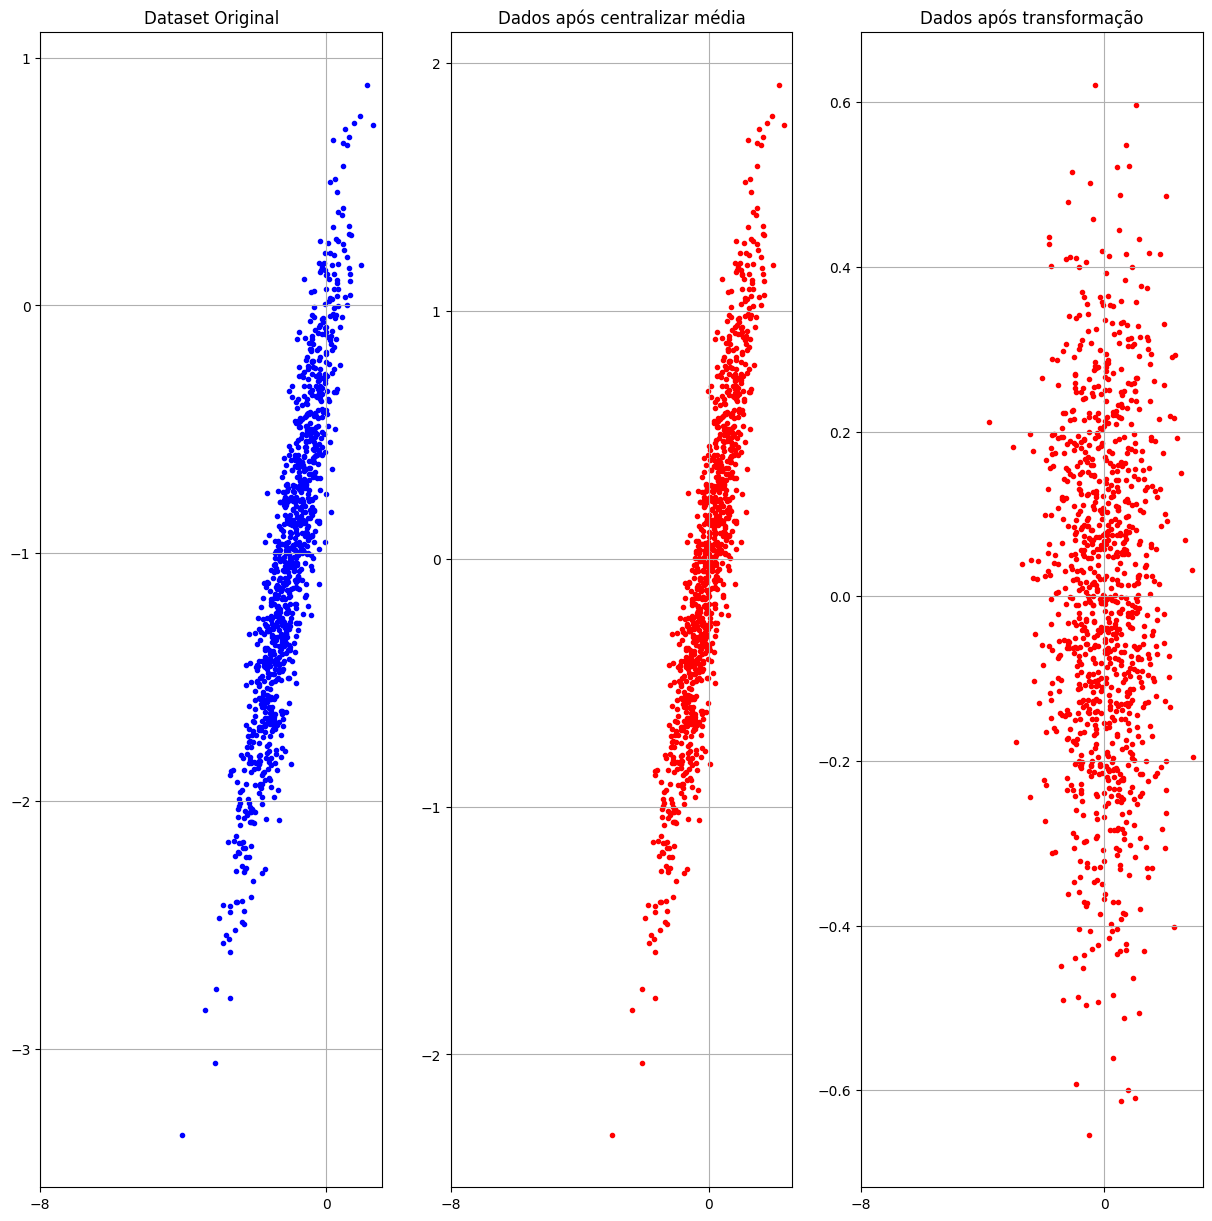

In [41]:
# Plot data

fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Dataset Original")
ax[1].set_title("Dados após centralizar média")
ax[2].set_title("Dados após transformação")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')

#  Reverter PCA / Reconstruir dados a partir dos N componentes

In [42]:
# Reverse PCA transformation
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 2)


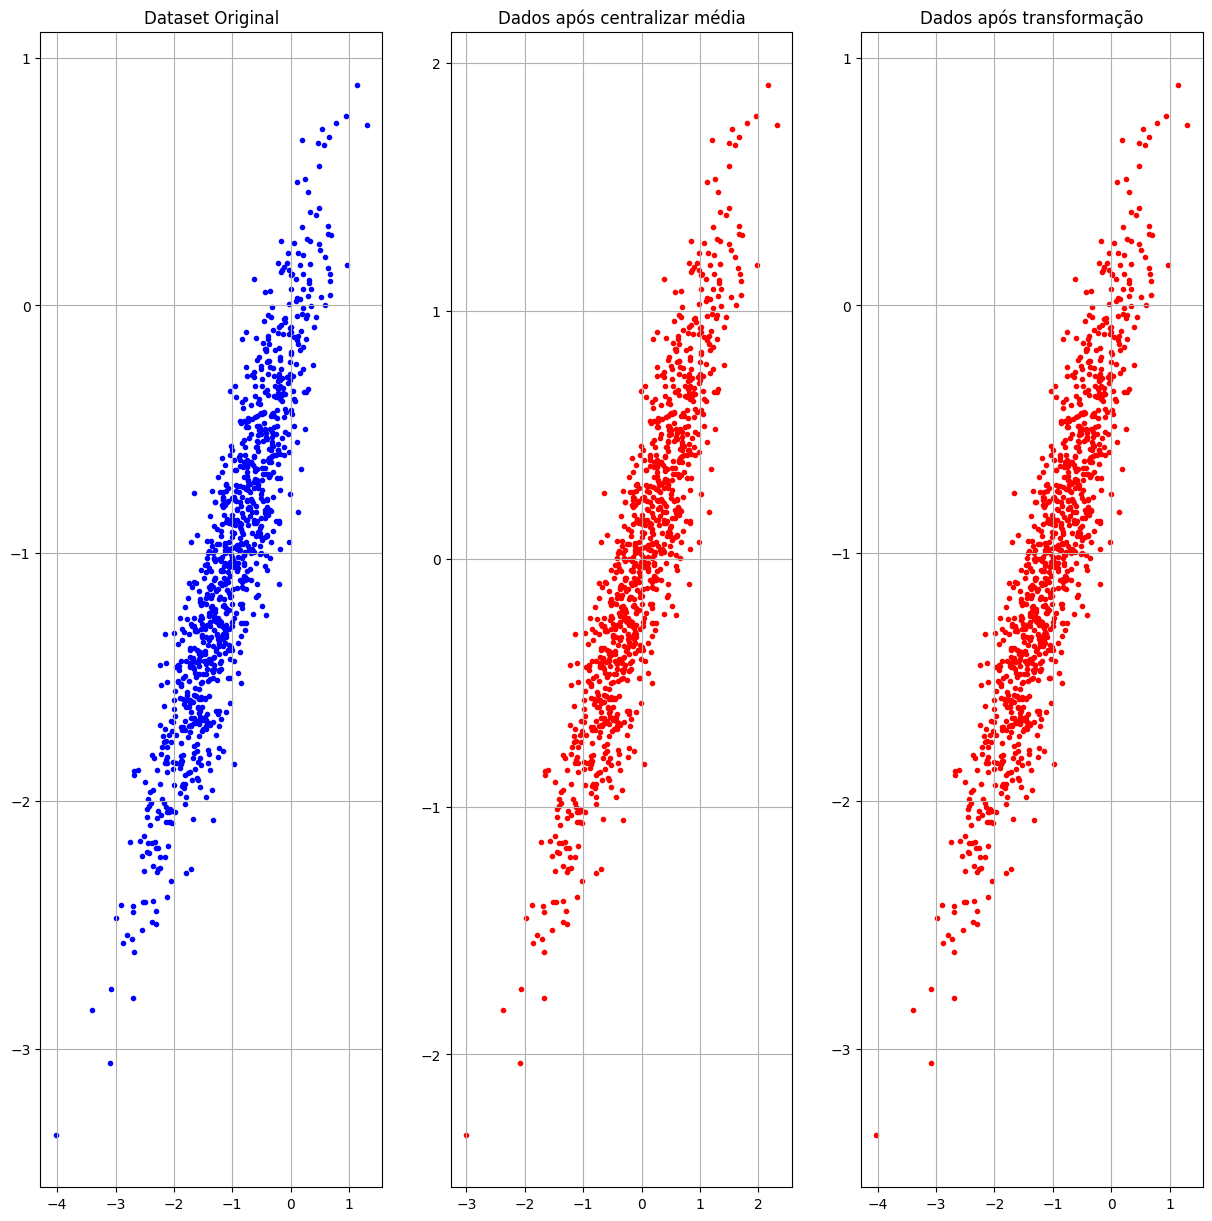

In [43]:
# Plot reconstructed data

fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
ax[0].set_title("Dataset Original")
ax[1].set_title("Dados após centralizar média")
ax[2].set_title("Dados após transformação")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()

### Reconstruction loss

In [44]:
# Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Perda após reconstrução:", loss)

Perda após reconstrução: 5.2755073036655163e-33
